In [128]:
import codecs
import json
import re
import requests

from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [129]:
PATTERN = r"{}\s+=\s+JSON.parse\(\'(.*?)\'\)"

def fetch(url):

    with requests.get(url) as response:
        return response.text

def find_match(scripts, pattern):

    for script in scripts:
        match = re.search(pattern, script.string)
        if match:
            break
    return match

def decode_data(match):

    byte_data = codecs.escape_decode(match.group(1))
    json_data = json.loads(byte_data[0].decode("utf-8"))

    return json_data

def get_data(url):

    html = fetch(url)
    soup = BeautifulSoup(html, "html.parser")
    scripts = soup.find_all("script")

    pattern = re.compile(PATTERN.format('shotsData'))
    match = find_match(scripts, pattern)
    data = decode_data(match)
    return data


url = 'https://understat.com/match/14795'
data = get_data(url)

In [130]:
df = pd.DataFrame(data['h'])
df['team']='Brighton'
df_brighton = df[['minute', 'team','xG','player','result']]

In [131]:
df = pd.DataFrame(data['a'])
df['team']='Manchester City'
df_city = df[['minute', 'team','xG','player','result']]

In [132]:
df = df_city. append(df_brighton, ignore_index=True)

In [133]:
df

,minute,team,xG,player,result
0,1,Manchester City,0.5506019592285156,Ilkay Gündogan,Goal
1,17,Manchester City,0.06140192598104477,Riyad Mahrez,BlockedShot
2,22,Manchester City,0.11998884379863739,Phil Foden,BlockedShot
3,44,Manchester City,0.03463852033019066,Rúben Dias,MissedShots
4,47,Manchester City,0.12834660708904266,Phil Foden,Goal
5,74,Manchester City,0.058934979140758514,Riyad Mahrez,SavedShot
6,90,Manchester City,0.060078464448451996,Gabriel Jesus,SavedShot
7,90,Manchester City,0.061068471521139145,Eric Garcia,MissedShots
8,4,Brighton,0.020752480253577232,Pascal Groß,BlockedShot
9,12,Brighton,0.04655466973781586,Pascal Groß,BlockedShot


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   minute  27 non-null     object
 1   team    27 non-null     object
 2   xG      27 non-null     object
 3   player  27 non-null     object
 4   result  27 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [135]:
df = df.apply(pd.to_numeric,errors='ignore')

In [136]:

#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


#this finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = df['team'].iloc[-1]
print(hteam)
ateam = df['team'].iloc[0]
print(ateam)

for x in range(len(df['xG'])):
    print(df['team'][x])
    print(ateam)
    if df['team'][x]==ateam:
        print(df['xG'][x],df['minute'][x])
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])
        
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

Brighton
Manchester City
Manchester City
Manchester City
0.5506019592285156 1
Manchester City
Manchester City
0.0614019259810447 17
Manchester City
Manchester City
0.1199888437986373 22
Manchester City
Manchester City
0.0346385203301906 44
Manchester City
Manchester City
0.1283466070890426 47
Manchester City
Manchester City
0.0589349791407585 74
Manchester City
Manchester City
0.0600784644484519 90
Manchester City
Manchester City
0.0610684715211391 90
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City
Brighton
Manchester City


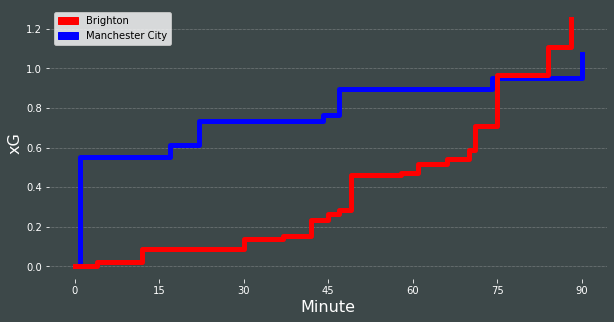

In [149]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='blue',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cumulative,color='red',label=ateam,linewidth=5,where='post')
plt.savefig('city_brih.png')


import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='Brighton')
white_patch = mpatches.Patch(color='blue', label='Manchester City')
plt.legend(handles=[red_patch,white_patch])